In [1]:
# Import Libs
import numpy as np
import matplotlib.pyplot as plt

# Support LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [34]:
def plot_results(system_name, ax, a_data, b_data, c_data, xticks, counts):
    bar_width = 0.3
    
    a_err = map(lambda x: x * 0.05, a_data)
    b_err = map(lambda x: x * 0.05, b_data)
    c_err = map(lambda x: x * 0.05, c_data)    
    
    ax.bar(xticks - bar_width, a_data, bar_width, color="r", yerr=a_err, capsize=5)
    ax.bar(xticks, b_data, bar_width, color="gold", yerr=b_err, capsize=5)
    ax.bar(xticks + bar_width, c_data, bar_width, color="b", yerr=c_err, capsize=5)
    
    # Set up chart style
    ax.grid(True, "major", "y")
    ax.set_xticks(xticks)
    ax.set_xticklabels(counts)
    ax.set_title(f"\\textbf{{{system_name}}}", fontsize=15)
    ax.set_xlabel(R"\textbf{Agent Count}", fontsize=13)
    ax.set_ylabel(R"\textbf{ms}", fontsize=13)
    ax.set_ylim(bottom=0.0)
    if log:
        ax.set_yscale("log")
    else:
        ax.set_ylim(top=top)
    ax.legend(("Separated", "Clumped", "Random"))


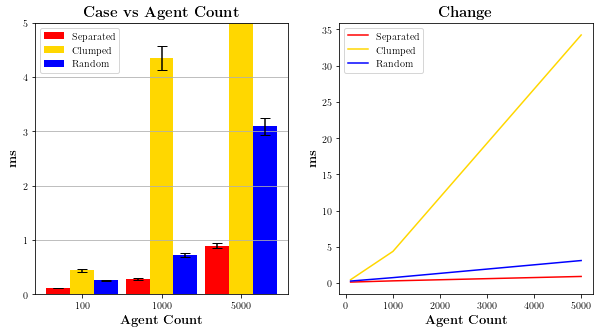

In [35]:
# Axes and ticks
system_names = ("Memory System", "Vision System")
agent_counts = (100, 1000, 5000)
xticks = np.arange(len(agent_counts))

# Uniform Grid measurements
ug_separated_msf = (0.1159, 0.2839, 0.8930)
ug_clumped_msf = (0.4423, 4.353, 34.24)
ug_random_msf = (0.2571, 0.7298, 3.09)

# Plot
fig, axes = plt.subplots(1, 2, figsize = (10,5))

plot_system_results("Case vs Agent Count", axes[0], ug_separated_msf, ug_clumped_msf, ug_random_msf, xticks, agent_counts, 5.0)

axes[1].plot(agent_counts, ug_separated_msf, color="r")
axes[1].plot(agent_counts, ug_clumped_msf, color="gold")
axes[1].plot(agent_counts, ug_random_msf, color="b")
axes[1].legend(("Separated", "Clumped", "Random"))
axes[1].set_xlabel(R"\textbf{Agent Count}", fontsize=13)
axes[1].set_ylabel(R"\textbf{ms}", fontsize=13)
axes[1].set_title(R"\textbf{Change}", fontsize=15)

plt.show()
fig.savefig("fig_uniform_grid_cases.pdf", bbox_inches='tight')